**Kaggle setup**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing all libraries**


In [1]:
import os 
import zipfile 
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from math import  floor
print(tf.__version__)

2.2.0


Using TensorFlow backend.


**Download and Unzip Dataset**

In [3]:
!kaggle datasets download -d muzin11/chest-xray-image

 98% 946M/962M [00:15<00:00, 58.7MB/s]
100% 962M/962M [00:15<00:00, 65.5MB/s]


In [ ]:
local_dir='/content/chest-xray-image.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

**Path Setup**

In [2]:
train_dir=os.path.join('/tmp/train')
validation_dir=os.path.join('/tmp/val')

In [3]:
print("TEST")
print(len(os.listdir("/tmp/train/NORMAL")))
print(len(os.listdir("/tmp/train/PNEUMONIA")))
print("TRAIN")
print(len(os.listdir("/tmp/val/NORMAL")))
print(len(os.listdir("/tmp/val/PNEUMONIA")))

TEST
870
1000
TRAIN
500
600


In [4]:
height=300
width=300
channel=3
batch_size=64

**Build the CNN model & Compile the model**

In [5]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(height,width,channel)))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(256,(3,3),activation='relu'))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Conv2D(512,(3,3),activation='relu'))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Conv2D(1024,(3,3),activation='relu'))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1,activation="sigmoid"))


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 256)       2

**image preprocessing**

In [6]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
     
      shear_range=0.2,
      zoom_range=0.2,
     
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255,
     zoom_range=0.2
)

train_generator = train_data_generator.flow_from_directory(train_dir,
                                                   
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=(height,width)) 
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                                  
                                                         batch_size=batch_size,
                                                         class_mode  = 'binary',
                                                         target_size = (height,width))

Found 1870 images belonging to 2 classes.
Found 1100 images belonging to 2 classes.


**Fit the model on images**

In [8]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=floor(train_generator.n/batch_size),
                              epochs=20,
                              validation_steps=floor(validation_generator.n/batch_size),
                              verbose=1)

Epoch 1/20
29/29 [==============================] - 85s 3s/step - loss: 0.7170 - accuracy: 0.5365 - val_loss: 0.6851 - val_accuracy: 0.5662
Epoch 2/20
29/29 [==============================] - 84s 3s/step - loss: 0.6532 - accuracy: 0.6202 - val_loss: 0.6550 - val_accuracy: 0.8070
Epoch 3/20
29/29 [==============================] - 85s 3s/step - loss: 0.5534 - accuracy: 0.7392 - val_loss: 0.5863 - val_accuracy: 0.7399
Epoch 4/20
29/29 [==============================] - 84s 3s/step - loss: 0.4661 - accuracy: 0.7890 - val_loss: 0.5711 - val_accuracy: 0.8226
Epoch 5/20
29/29 [==============================] - 85s 3s/step - loss: 0.3858 - accuracy: 0.8400 - val_loss: 0.5014 - val_accuracy: 0.7711
Epoch 6/20
29/29 [==============================] - 84s 3s/step - loss: 0.3635 - accuracy: 0.8455 - val_loss: 0.4180 - val_accuracy: 0.8649
Epoch 7/20
29/29 [==============================] - 85s 3s/step - loss: 0.3443 - accuracy: 0.8627 - val_loss: 0.5334 - val_accuracy: 0.7114
Epoch 8/20
29/29 [==

**Training and validation accuracy & loss**

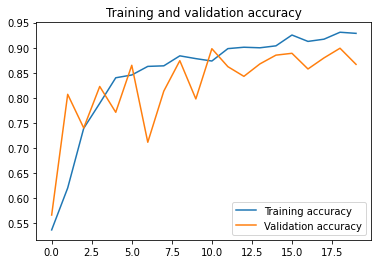

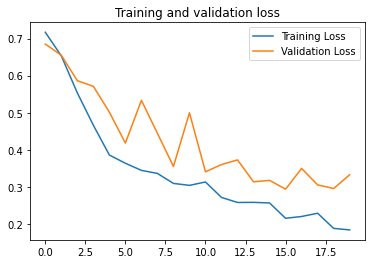

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure()
plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving NORMAL.jpeg to NORMAL.jpeg
Saving PNEUMONIA.jpeg to PNEUMONIA.jpeg
[0.]
NORMAL.jpeg Normal


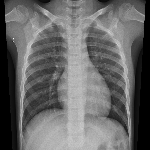

[1.]
PNEUMONIA.jpeg Pneumonia


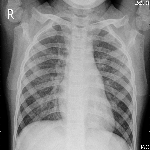

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(height,width))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " Pneumonia")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " Normal")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
